### linear regression


In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [30]:
data = pd.read_csv('../Data/processed_data.csv')

In [31]:
numerical_columns = data.select_dtypes(exclude='object').columns
numerical_features = numerical_columns.drop('rating')
numerical_features
categorical_columns = data.select_dtypes(include='object').columns
categorical_features = categorical_columns.drop('name')
categorical_features

Index(['general', 'specify', 'language', 'level', 'instructor', 'offered by'], dtype='object')

In [32]:
df_copy = data.copy()
df_copy = data[numerical_columns]
corr_matrix = round(df_copy.corr(),2)

corr_matrix

,enrollment,rating,duration,instructor_rate
enrollment,1.00,0.07,0.14,0.06
rating,0.07,1.00,0.03,0.62
duration,0.14,0.03,1.00,0.04
instructor_rate,0.06,0.62,0.04,1.00


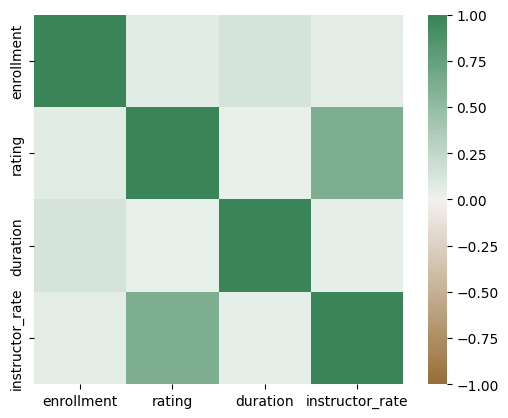

In [33]:
axis_corr = sns.heatmap(corr_matrix,
                        vmin=-1, vmax=1, center=0,
                        cmap=sns.diverging_palette(50, 500, n=500),
                        square=True
                        )

plt.show()

In [34]:
data.isnull().sum()

name                0
general             1
specify             1
enrollment          0
language            0
rating              0
level               0
duration            0
instructor         15
instructor_rate     0
offered by         15
dtype: int64

In [35]:
X = data[numerical_features]
y = data['rating']

In [36]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X,y, train_size=0.7,random_state = 5)

X_test, X_val,  y_test, y_val = train_test_split(X_test_val,y_test_val, train_size=2/3,random_state = 5)


In [37]:
lr = LinearRegression()

In [38]:
lr.fit(X_train, y_train)

LinearRegression()

In [39]:
c = lr.intercept_
c

2.073681875184108

In [40]:
m = lr.coef_
m

array([1.11157730e-07, 1.28931922e-04, 5.48587890e-01])

In [41]:
y_train_pred = lr.predict(X_train)


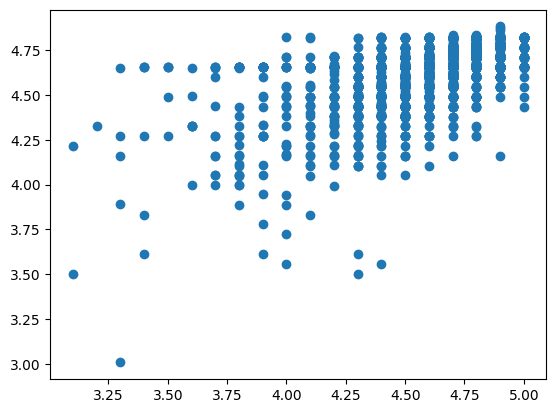

In [42]:
plt.scatter(y_train, y_train_pred)

In [43]:
mse = mean_squared_error(y_train, y_train_pred)
mse

0.03576392961534095

In [44]:
y_test_pred = lr.predict(X_test)


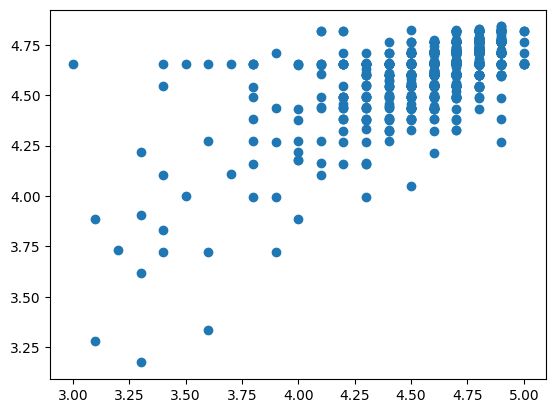

In [45]:
plt.scatter(y_test, y_test_pred)

In [18]:
mse = mean_squared_error(y_test, y_test_pred)
mse

0.040419549961442314